# Practice
<b><h2>1. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해</h2></b>

In [4]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
#사이킷런에서는 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [5]:
newsdata = fetch_20newsgroups(subset='train') 
# 'train'을 기재하면 훈련 데이터만 리턴한다.
# subset ='all'을 넣으면 전체 데이터인 18,846개의 샘플을 다운로드
# subset ='test'을 넣으면 테스트 데이터인 샘플을 다운로드

In [95]:
print(newsdata.keys())   # 속성출력

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


- Practice에서 사용할 속성은 "data", "target"

In [9]:
print("훈련용 샘플의 개수 : {}".format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [10]:
print("총 주제의 개수 : {}".format(len(newsdata.target_names)))

총 주제의 개수 : 20


In [11]:
print(newsdata.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


- Practice의 목적 : 이메일 본문을 보고 20개 주제 중 어떤 주제인지 맞추는 것

In [12]:
print("첫 번째 샘플의 레이블 : {}".format(newsdata.target[0]))

첫 번째 샘플의 레이블 : 7


In [13]:
print("7 번째 레이블의 주제 : {}".format(newsdata.target_names[7]))

7 번째 레이블의 주제 : rec.autos


In [15]:
# 첫 번째 샘플의 data 출력
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







- 훈련에 사용될 메일의 본문인 data와 레이블인 target을 데이터프레임으로 만듬

In [18]:
# data로 데이터프레임 생성
data =  pd.DataFrame(newsdata.data, columns=['email'])
data

,email
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311,From: westes@netcom.com (Will Estes)\nSubject:...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...


In [21]:
# 데이터프레임에 target 추가
data['target'] = pd.Series(newsdata.target)
data

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
email     11314 non-null object
target    11314 non-null int32
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


- Null값 확인

In [24]:
data.isnull().values.any()   # False는 Null값이 없음. True는 있음

False

- 중복 제거한 개수 확인

In [25]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


- 레이블 값의 분포를 시각화

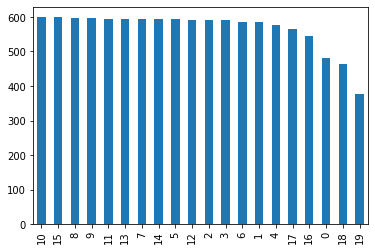

In [27]:
data['target'].value_counts().plot(kind='bar')

10번 레이블의 수가 가장 많고, 19번 레이블의 수가 가장 적으며 대략적으로 400-600개 사이의 분포를 보임.

- 각 레이블이 몇 개 있는지 수치 확인

In [50]:
print(data.groupby('target').size()) #.reset_index(name='count'))
# print(data.groupby('target').size().reset_index(name='count'))

target
0     480
1     584
2     591
3     590
4     578
5     593
6     585
7     594
8     598
9     597
10    600
11    595
12    591
13    594
14    593
15    599
16    546
17    564
18    465
19    377
dtype: int64


- 본격적으로 Train 데이터의 Input과 output(label)을 분리
- Test 데이터 read

In [51]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
newsdata_test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [52]:
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

- <b>전처리 진행</b>

In [53]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20

In [68]:
# 전처리 함수
def prepare_data(train_data, test_data, mode):   
    t = Tokenizer(num_words=max_words)
    t.fit_on_texts(train_data)    # 단어에 인덱스 부여
    X_train = t.texts_to_matrix(train_data, mode=mode)
    X_test = t.texts_to_matrix(test_data, mode=mode)
    return X_train, X_test, t.word_index

- 전처리 함수를 정의하고
- Tokenizer를 통해서
- 1) 단어에 인덱스 부여
- 2) Train/Test데이터를 분리하고 mode를 통해 어떤 방식으로 matrix를 구성할지 결정

In [77]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

- 메일 본문을 binary모드로 변환하였고, y 데이터(레이블)은 원-핫 인코딩을 수행

In [70]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


- 훈련 데이터와 테스트 데이터 모두 메일 본문의 크기가 샘플의 수 × 10,000의 행렬로 변환
- 단어의 정수 인덱스는 1부터 시작하지만, 행렬의 인덱스는 0부터 시작하여 0번 인덱스는 사용되지 않으므로 실제로 행렬에는 빈도수 기준 상위 9,999개의 단어가 표현

In [72]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

KeyError: 1

# 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [107]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

1. Sequentail로 모델 생성
2. Dense 추가로 "Input layer(뉴런개수:max_words)" - "1st Hidden(뉴런:256)" - "2dn Hidden(뉴런:128)" - "Output(뉴런:num_classes)"
3. Dropout 추가
4. 각 층에 활성화 함수는 "relu"를 사용하며 Output에서는 여러개 중 하나를 선택해야 함으로 "softmax" 사용

- 모델 훈련

In [108]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes:
    X_train, X_test, _ = prepare_data(train_email, test_email, mode)
    score = fit_and_evaluate(X_train, y_train, X_test, y_test)
    print(mode+"모드의 테스트 정확도:", score)

Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 11s 1ms/step - loss: 2.3003 - acc: 0.3375 - val_loss: 0.9741 - val_acc: 0.8366
Epoch 2/5
10182/10182 [==============================] - 10s 973us/step - loss: 0.8693 - acc: 0.7627 - val_loss: 0.4736 - val_acc: 0.8781
Epoch 3/5
10182/10182 [==============================] - 11s 1ms/step - loss: 0.4269 - acc: 0.8839 - val_loss: 0.3600 - val_acc: 0.9002
Epoch 4/5
10182/10182 [==============================] - 10s 985us/step - loss: 0.2570 - acc: 0.9334 - val_loss: 0.3104 - val_acc: 0.9108
Epoch 5/5
10182/10182 [==============================] - 10s 1ms/step - loss: 0.1712 - acc: 0.9596 - val_loss: 0.2995 - val_acc: 0.9152
binary모드의 테스트 정확도: 0.825411577143697
Train on 10182 samples, validate on 1132 samples
Epoch 1/5
10182/10182 [==============================] - 11s 1ms/step - loss: 2.6133 - acc: 0.2580 - val_loss: 1.4751 - val_acc: 0.7447
Epoch 2/5
10182/10182 [======================